In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [8]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\dmpa\\dmpa_project_sc\\cleaned_data.csv")
data.head(5)

,Unnamed: 0,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line_item_insurance
0,1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,240.117626
1,3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,240.117626
2,4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,240.117626
3,5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,...,240,416,2225.6,5.35,0.02,"Aurobindo Unit III, India",True,504,5920.42,240.117626
4,6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,...,90,135,4374.0,32.40,0.36,MSD South Granville Australia,True,328,Freight Included in Commodity Cost,240.117626


In [9]:
features = ['line item quantity', 'line item value']
X = data[features]

In [10]:
# used for scaling the values it is used to standardize and normalize
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd


In [11]:
#n_neighbours-consider the nearest values for local density contamination is the proportion of data
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

#this fits the lof model to x_scaled predict method predicts the features with -1
y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1


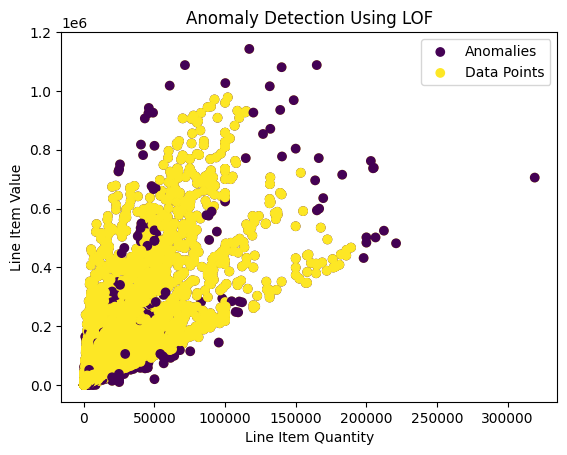

In [12]:
plt.scatter(X['line item quantity'], X['line item value'], c=is_anomaly, cmap='viridis', label='Anomalies')
plt.scatter(X['line item quantity'], X['line item value'], c=np.logical_not(is_anomaly), cmap='viridis', label='Data Points')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.title('Anomaly Detection Using LOF')
plt.legend(loc='upper right')
plt.show()


In [13]:
anomalies = data[is_anomaly]
print("Anomalies:")
print(anomalies)

Anomalies:
      Unnamed: 0     id project code            pq #   po / so #  asn/dn #  \
16            30    161   117-ET-T01  Pre-PQ Process  SCMS-11070   ASN-916   
31            65    637   108-VN-T01  Pre-PQ Process  SCMS-26200  ASN-2563   
34            72    719   104-CI-T01  Pre-PQ Process  SCMS-29340  ASN-2921   
72           122   1179   108-VN-T01  Pre-PQ Process  SCMS-44990  ASN-4302   
82           138   1283   108-VN-T01  Pre-PQ Process    SCMS-170   ASN-273   
...          ...    ...          ...             ...         ...       ...   
7830       10284  86758   104-CI-T30       FPQ-14370    SO-49052   DN-4064   
7834       10289  86782   111-MZ-T30       FPQ-15195    SO-50121   DN-4153   
7854       10311  86809   114-UG-T30       FPQ-15294    SO-50070   DN-4259   
7860       10318  86817   103-ZW-T30       FPQ-15197    SO-50020   DN-4307   
7861       10319  86818   103-ZW-T30       FPQ-15197    SO-50020   DN-4307   

            country managed by  fulfill via vendor i

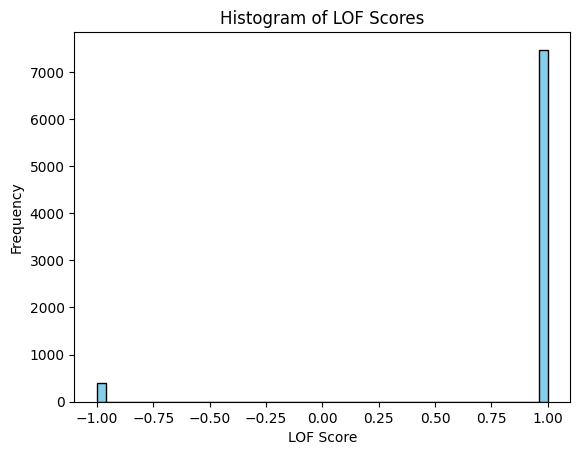

In [14]:

plt.hist(y_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.show()

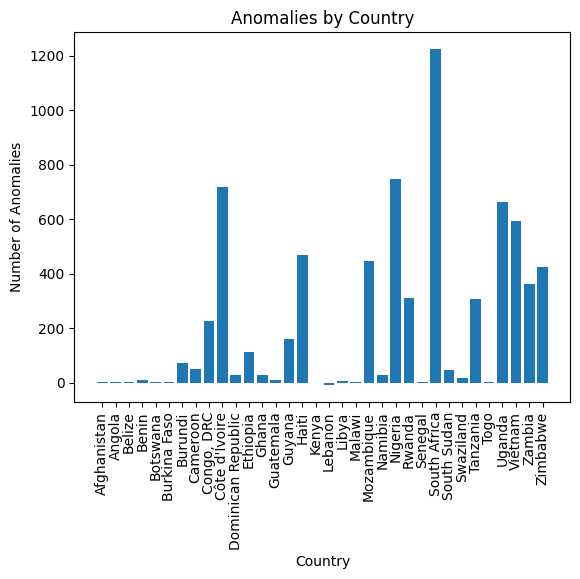

In [15]:
data['Anomaly'] = y_pred  # Assuming y_pred contains anomaly labels
anomaly_counts = data.groupby('country')['Anomaly'].sum().reset_index()
plt.bar(anomaly_counts['country'], anomaly_counts['Anomaly'])
plt.xlabel('Country')
plt.ylabel('Number of Anomalies')
plt.title('Anomalies by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


In [16]:
# import seaborn as sns
# sns.pairplot(data, hue='Anomaly', palette={-1: 'red', 1: 'blue'})
# plt.title('Pairwise Scatter Plot with Anomalies')
# plt.show()


